In [1]:
import os
print("You are here:", os.getcwd())
print("Files here:", os.listdir())


You are here: /Users/ahmedhassan/Documents/GitHub/healthcare-data-analysis/code
Files here: ['Healthcare_Data_Analysis.ipynb', '.ipynb_checkpoints']


In [2]:
print(os.listdir("Dataset"))
print(os.listdir("Dataset/raw"))


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset'

In [3]:
import os
print(os.listdir(".."))


['.DS_Store', 'Dataset', 'Diagrams', 'code', 'Written Report', 'README.md', 'Dashboard', '.ipynb_checkpoints', '.git']


In [4]:
print(os.listdir("../Dataset"))
print(os.listdir("../Dataset/raw"))


['.DS_Store', 'cleaned', 'raw']
['healthcare_dataset.csv']


In [5]:
import pandas as pd

df = pd.read_csv("../Dataset/raw/healthcare_dataset.csv")
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [6]:
print("Rows, Columns:", df.shape)
print("\nColumn names:")
print(list(df.columns))

print("\nMissing values per column:")
print(df.isna().sum())


Rows, Columns: (55500, 15)

Column names:
['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']

Missing values per column:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [7]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,55500,49992,DAvId muNoZ,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,55500.0,NaN,NaN,NaN,51.539459,19.602454,13.0,35.0,52.0,68.0,89.0
Gender,55500,2,Male,27774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,55500,8,A-,6969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,55500,6,Arthritis,9308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,55500,1827,2024-03-16,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,55500,40341,Michael Smith,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital,55500,39876,LLC Smith,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance Provider,55500,5,Cigna,11249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,55500.0,NaN,NaN,NaN,25539.316097,14211.454431,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736


In [8]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)
df.columns


Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results'],
      dtype='object')

In [9]:
df["date_of_admission"] = pd.to_datetime(df["date_of_admission"], errors="coerce")
df["discharge_date"] = pd.to_datetime(df["discharge_date"], errors="coerce")

df[["date_of_admission", "discharge_date"]].head()


,date_of_admission,discharge_date
0,2024-01-31,2024-02-02
1,2019-08-20,2019-08-26
2,2022-09-22,2022-10-07
3,2020-11-18,2020-12-18
4,2022-09-19,2022-10-09


In [10]:
df["length_of_stay_days"] = (df["discharge_date"] - df["date_of_admission"]).dt.days

df["length_of_stay_days"].describe()


count    55500.000000
mean        15.509009
std          8.659600
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: length_of_stay_days, dtype: float64

In [11]:
df["billing_amount"] = pd.to_numeric(df["billing_amount"], errors="coerce")
df["billing_amount"].describe()


count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224652
50%      25538.069376
75%      37820.508436
max      52764.276736
Name: billing_amount, dtype: float64

In [12]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print("Removed duplicates:", before - after)


Removed duplicates: 534


In [13]:
clean_path = "../Dataset/cleaned/healthcare_cleaned.csv"
df.to_csv(clean_path, index=False)
print("Saved cleaned file to:", clean_path)


Saved cleaned file to: ../Dataset/cleaned/healthcare_cleaned.csv


In [14]:
import os
print(os.listdir("../Dataset/cleaned"))


['healthcare_cleaned.csv']


In [15]:
import numpy as np

# 1) Fix negative billing (turn negatives into missing values)
df.loc[df["billing_amount"] < 0, "billing_amount"] = np.nan

# 2) Create admission_month for charts
df["admission_month"] = df["date_of_admission"].dt.to_period("M").astype(str)

# Quick check
print("Negative billing left:", (df["billing_amount"] < 0).sum())
print("Missing billing after fix:", df["billing_amount"].isna().sum())
df[["billing_amount", "admission_month"]].head()


Negative billing left: 0
Missing billing after fix: 106


,billing_amount,admission_month
0,18856.281306,2024-01
1,33643.327287,2019-08
2,27955.096079,2022-09
3,37909.782410,2020-11
4,14238.317814,2022-09


In [16]:
import matplotlib.pyplot as plt

# This makes the charts readable
plt.rcParams["figure.figsize"] = (10, 6)

def save_chart(filename):
    path = f"../Dashboard/charts/{filename}"
    plt.tight_layout()
    plt.savefig(path, dpi=200)
    print("Saved:", path)



Saved: ../Dashboard/charts/01_admissions_by_type.png


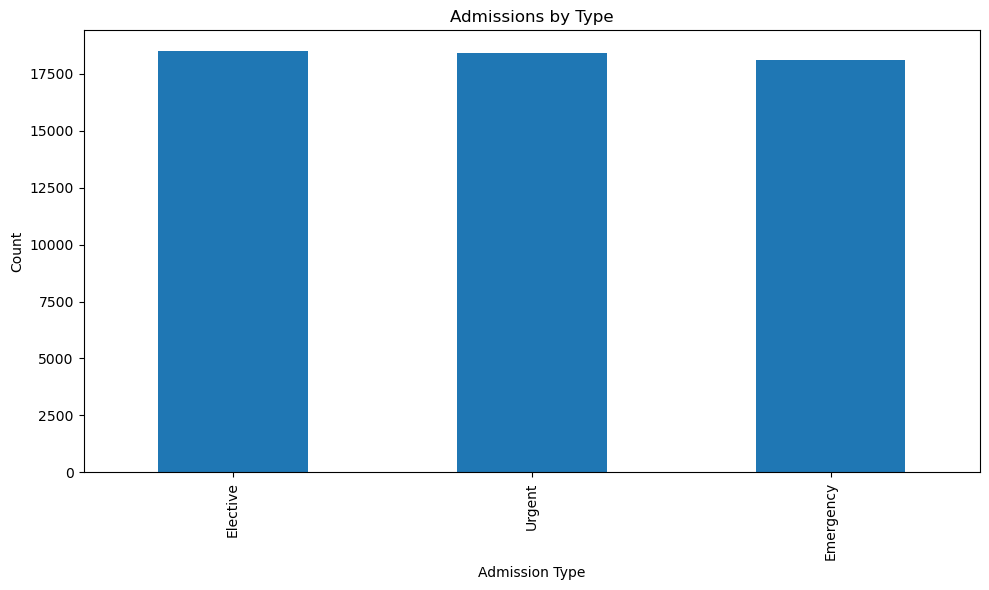

In [17]:
df["admission_type"].value_counts().plot(kind="bar")
plt.title("Admissions by Type")
plt.xlabel("Admission Type")
plt.ylabel("Count")
save_chart("01_admissions_by_type.png")
plt.show()


Saved: ../Dashboard/charts/02_top_conditions.png


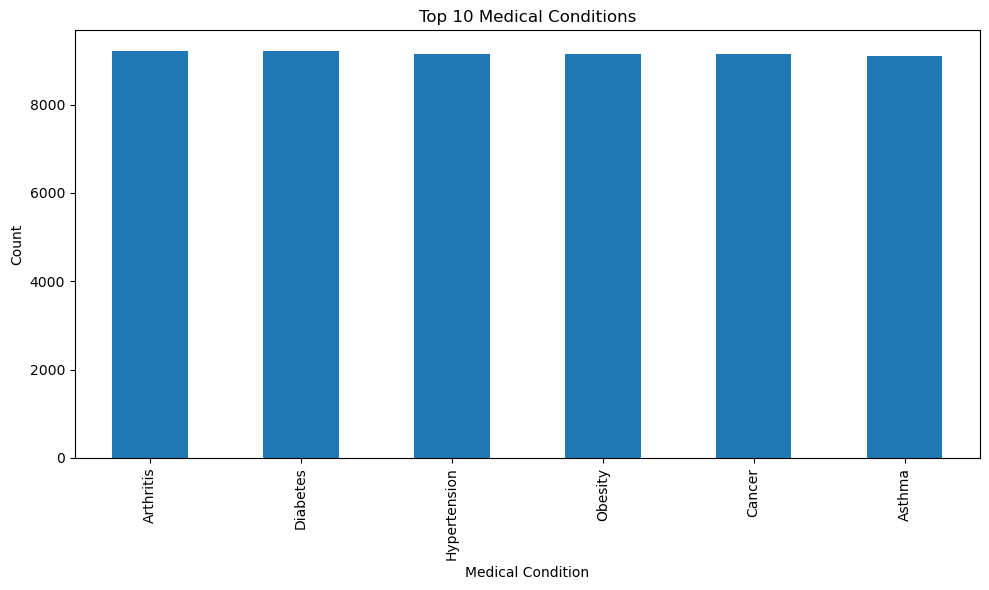

In [18]:
df["medical_condition"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Medical Conditions")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
save_chart("02_top_conditions.png")
plt.show()
